# Использование библиотеки _scikit-learn_ для работы с простыми регрессионными моделями

1. Линейная регрессия
2. Метод опорных векторов
3. Дерево решений

### Как работает регрессия

**Регрессия** — это тип задачи, в которой цель заключается в предсказании непрерывной числовой величины (целевой переменной) на основе входных данных (признаков). В отличие от классификации, где предсказывается категориальная метка (например, "кот" или "собака"), регрессия предсказывает числовое значение, которое может принимать непрерывный ряд значений.

### Основные понятия регрессии:
1. **Целевая переменная (зависимая переменная)**:
   - Это значение, которое мы хотим предсказать. Например, температура, коэффициент поглощения и т.д.

2. **Признаки (независимые переменные)**:
   - Это входные данные, которые используются для предсказания целевой переменной. Например, для предсказания коэффициента поглощения полупроводника признаками могут быть длина волны, уровень легирования, температура и т.д.

3. **Модель регрессии**:
   - Это математическая функция $\vec{y} = f(\vec{x}, a, b, \ldots)$, которая связывает признаки $\vec{x}$ с целевой переменной $\vec{y}$. Модель обучается на данных, настраивая параметры $a, b, \ldots$ чтобы находить закономерности и делать предсказания.

### Примеры задач регрессии:
- **Предсказание цены дома** на основе его характеристик (площадь, количество комнат, местоположение).
- **Прогнозирование спроса на товар** на основе исторических данных.
- **Оценка времени доставки** заказа в зависимости от расстояния и загруженности дорог.
- **Предсказание температуры** на основе метеорологических данных.

### Типы регрессии:
1. **Линейная регрессия**:
   - Предполагает, что зависимость между признаками и целевой переменной линейна. Модель выражается уравнением:
     
     $$
     y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b,
     $$
     
     где $y$ — целевая переменная, $x_1, x_2, \dots, x_n$ — признаки, $w_1, w_2, \dots, w_n$ — коэффициенты наклона (веса), $b$ — смещение.

2. **Полиномиальная регрессия**:
   - Используется, если зависимость между признаками и целевой переменной нелинейна. Модель включает полиномиальные члены, например:
     $$
     y = w_1 x + w_2 x^2 + \dots + w_n x^n + b.
     $$

3. **Регрессия методом опорных векторов (SVR)**:
   - Использует принципы SVM для решения задач регрессии. Позволяет моделировать сложные нелинейные зависимости с помощью ядерных функций.

4. **Регрессия на основе деревьев (например, Random Forest, Gradient Boosting)**:
   - Использует ансамбли деревьев решений для предсказания целевой переменной. Хорошо работает с нелинейными данными и данными с выбросами.

5. **Нейронные сети**:
   - Используются для сложных задач регрессии, где зависимости между признаками и целевой переменной трудно описать простыми моделями.

### Как работает регрессия:
1. **Обучение модели**:
   - На этапе обучения модель настраивает свои параметры, чтобы минимизировать ошибку между предсказанными и реальными значениями целевой переменной. Для настройки (обучения) часто используются варианты метода градиентного спуска (GD). При этом минимизируется **функция потерь**, например, среднеквадратичная ошибка (MSE):
     $$
     \text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2,
     $$
     где $y_i$ — реальное значение, $\hat{y}_i$ — предсказанное значение.

2. **Предсказание**:
   - После обучения модель может предсказывать значения целевой переменной для новых данных.

### Метрики для оценки регрессии:
- **Среднеквадратичная ошибка (MSE)**:
  - Среднее значение квадратов разностей между предсказанными и реальными значениями.
- **Средняя абсолютная ошибка (MAE)**:
  - Среднее значение абсолютных разностей между предсказанными и реальными значениями.
- **Коэффициент детерминации ($R^2$)**:
  - Показывает, насколько хорошо модель объясняет дисперсию данных. Значение $R^2$ близкое к 1 указывает на хорошее качество модели.

# Линейная регрессия в scikit-learn

Среднеквадратичная ошибка (MSE): 0.65
Коэффициент детерминации (R^2): 0.81


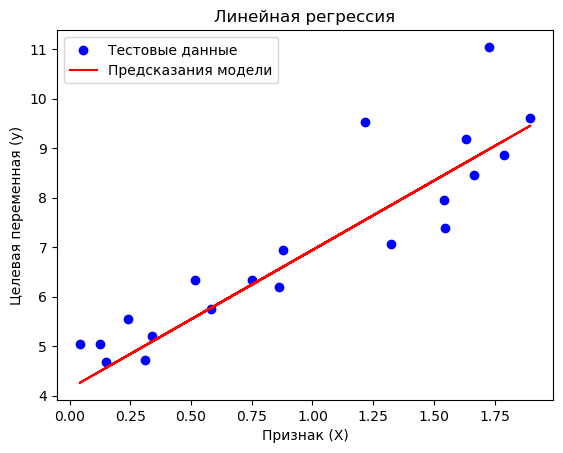

In [6]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Создаем искусственный набор данных
np.random.seed(42)  # Для воспроизводимости результатов
X = 2 * np.random.rand(100, 1)  # 100 случайных значений в диапазоне [0, 2]
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3*X + шум

# 2. Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

# 5. Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

# Визуализация результатов
plt.scatter(X_test, y_test, color='blue', label='Тестовые данные')
plt.plot(X_test, y_pred, color='red', label='Предсказания модели')
plt.xlabel('Признак (X)')
plt.ylabel('Целевая переменная (y)')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

# Метод опорных векторов в scikit-learn

Метод опорных векторов для регрессии (SVR, Support Vector Regression) — это адаптация классического метода опорных векторов (SVM) для задач регрессии. Основная идея SVR заключается в том, чтобы найти функцию, которая предсказывает целевую переменную с минимальной ошибкой, при этом допуская небольшие отклонения (заданные параметром \(\epsilon\)).

### Основные концепции SVR:

1. **$epsilon$-трубка**:
   - В SVR вводится понятие $\epsilon$-трубки вокруг предсказанной функции. Ошибки, которые попадают внутрь этой трубки, не учитываются в функции потерь. Только ошибки, выходящие за пределы трубки, штрафуются.
   - Это делает модель устойчивой к шуму и выбросам, так как небольшие отклонения игнорируются.

2. **Функция потерь**:
   - SVR минимизирует функцию потерь, которая включает два компонента:
     - **Ошибку вне $\epsilon$-трубки**: Штраф за отклонения, превышающие $\epsilon$.
     - **Регуляризационный член**: Контролирует сложность модели, чтобы избежать переобучения.

3. **Ядерные функции**:
   - SVR может использовать ядерные функции для преобразования данных в пространство более высокой размерности, где нелинейные зависимости становятся линейными. Это позволяет моделировать сложные нелинейные зависимости.
   - Примеры ядер: линейное, полиномиальное, радиальная базисная функция (RBF).

### Как работает SVR:

1. **Задача оптимизации**:
   - SVR решает задачу оптимизации, где цель — найти функцию $ f(x) = w^T x + b $, которая минимизирует ошибку предсказания, оставаясь в пределах $\epsilon$-трубки.
   - Формально задача выглядит так:
     $$
     \text{минимизировать } \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*)
     $$
     при условиях:
     $$
     y_i - (w^T x_i + b) \leq \epsilon + \xi_i,
     $$
     $$
     (w^T x_i + b) - y_i \leq \epsilon + \xi_i^*,
     $$
     $$
     \xi_i, \xi_i^* \geq 0.
     $$
   - Здесь:
     - $ w $ — веса модели,
     - $b $ — смещение,
     - $ \xi_i, \xi_i^* $ — переменные, которые учитывают ошибки вне $\epsilon$-трубки,
     - $ C $ — параметр регуляризации, который контролирует компромисс между минимизацией ошибки и сложностью модели.

2. **Опорные векторы**:
   - Опорные векторы — это точки данных, которые лежат на границе или за пределами $\epsilon$-трубки. На них "опирается" полоса, в которую должны попадать точки. Они играют ключевую роль в определении функции регрессии.

3. **Использование ядер**:
   - Если данные нелинейны, SVR использует ядерные функции для преобразования данных в пространство, где они становятся линейно разделимыми. Например, ядро RBF (радиальная базисная функция) позволяет моделировать сложные нелинейные зависимости.

![svr](./lecture3/svr.jpeg)


**Ядерный трюк в SVR** позволяет работать с нелинейными зависимостями, не вычисляя явно преобразование данных в высокоразмерное пространство. Вместо этого используются **ядерные функции**, которые вычисляют скалярное произведение векторов в этом пространстве напрямую через исходные данные.

### Формулы с использованием ядер в SVR
1. **Функция регрессии**:  
   После применения ядерного трюка предсказание модели имеет вид:  
   $$
   f(x) = \sum_{i=1}^n (\alpha_i - \alpha_i^*) \cdot K(x_i, x) + b
   $$  
   где:
   - $\alpha_i, \alpha_i^*$ — коэффициенты Лагранжа (находятся в процессе оптимизации),
   - $K(x_i, x)$ — ядерная функция,
   - $b$ — смещение.

2. **Двойственная задача оптимизации**:  
   Задача максимизации:  
   $$
   \max_{\alpha, \alpha^*} \left[ -\frac{1}{2} \sum_{i,j=1}^n (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) K(x_i, x_j) - \epsilon \sum_{i=1}^n (\alpha_i + \alpha_i^*) + \sum_{i=1}^n y_i (\alpha_i - \alpha_i^*) \right]
   $$  
   при ограничениях:  
   $$
   \sum_{i=1}^n (\alpha_i - \alpha_i^*) = 0, \quad 0 \leq \alpha_i, \alpha_i^* \leq C.
   $$

3. **Популярные ядерные функции**:
   - **Линейное**: $K(x, x') = x \cdot x'$,
   - **Полиномиальное**: $K(x, x') = (x \cdot x' + c)^d$,
   - **RBF (радиальная базисная функция)**: $K(x, x') = \exp\left(-\gamma \|x - x'\|^2\right)$,
   - **Сигмоидное**: $K(x, x') = \tanh(\gamma x \cdot x' + c)$.

### Пример работы ядерного трюка
Для RBF-ядра вместо явного вычисления \(\phi(x)\) (например, в бесконечномерном пространстве) используется:  
$$
K(x_i, x_j) = \exp\left(-\gamma \|x_i - x_j\|^2\right).
$$  
Это позволяет моделировать сложные нелинейные зависимости, сохраняя вычислительную эффективность.

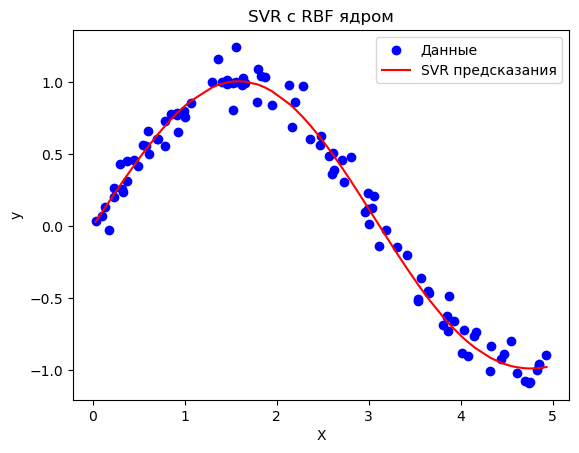

In [37]:
### Пример использования SVR в `scikit-learn`:
from sklearn.svm import SVR

# Создаем искусственные данные
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.1  # y = sin(X) + шум

# Создаем и обучаем модель SVR
svr = SVR(kernel='rbf', C=100, gamma = 0.1, epsilon=0.1)
svr.fit(X, y)

# Предсказания
y_pred = svr.predict(X)

# Визуализация
plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X, y_pred, color='red', label='SVR предсказания')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR с RBF ядром')
plt.legend()
plt.show()

### Объяснение параметров:
- **kernel**: Тип ядра (например, 'linear', 'rbf', 'poly').
- **C**: Параметр регуляризации. Большие значения $ C $ увеличивают штраф за ошибки вне $\epsilon$-трубки.
- **gamma**: Параметр ядра RBF, который определяет влияние каждого отдельного примера данных.
- **epsilon**: Ширина $\epsilon$-трубки. Ошибки внутри трубки не штрафуются.

### Преимущества SVR:
- Устойчивость к шуму и выбросам благодаря $\epsilon$-трубке.
- Возможность моделировать сложные нелинейные зависимости с помощью ядер.
- Хорошая обобщающая способность, особенно на небольших выборках.

### Недостатки SVR:
- Требует тщательного подбора гиперпараметров (например, $ C $, $\epsilon$, тип ядра).
- Может быть вычислительно затратным на больших выборках.

### Итог:
SVR стоит использовать, если данные имеют сложную нелинейную структуру, содержат выбросы или если требуется модель с хорошей обобщающей способностью. Однако для больших выборок или задач, где важна скорость, могут быть предпочтительны другие методы, такие как градиентный бустинг или нейронные сети

In [42]:
# Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split

# 1. Создаем искусственный набор данных с многомерными признаками
# Пример: Ширина запрещенной зоны, как функция состава, упругих напряжений, температуры
np.random.seed(42)  # Для воспроизводимости результатов
n_samples = 1000  # Количество примеров
n_features = 5  # Количество признаков

# Генерируем случайные признаки
X = np.random.rand(n_samples, n_features)

# Генерируем целевую переменную как линейную комбинацию признаков с добавлением шума
coefficients = np.array([3, -2, 5, 1, -4])  # Коэффициенты для каждого признака
y = np.dot(X, coefficients) + np.random.randn(n_samples) * 0.5  # y = X * coefficients + шум

# 2. Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Создаем и обучаем модель SVR
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)  # Используем линейное ядро
svr.fit(X_train, y_train)

# 4. Делаем предсказания на тестовых данных
y_pred = svr.predict(X_test)

# 5. Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

# Выводим предсказания и реальные значения для первых 5 примеров
print("\nПервые 5 предсказаний и реальных значений:")
for i in range(5):
    print(f"Предсказание: {y_pred[i]:.2f}, Реальное значение: {y_test[i]:.2f}")

Среднеквадратичная ошибка (MSE): 0.28
Коэффициент детерминации (R^2): 0.94

Первые 5 предсказаний и реальных значений:
Предсказание: 3.34, Реальное значение: 3.86
Предсказание: 1.75, Реальное значение: 1.89
Предсказание: -0.93, Реальное значение: -0.14
Предсказание: 1.46, Реальное значение: 2.36
Предсказание: 1.60, Реальное значение: 0.77


**Задание**

Вместо линейной зависимости задать квадратичную

coefficients = np.array([3, -2, 5, 1, -4])  # Коэффициенты для каждого признака
y = np.dot(X**2, coefficients) + np.random.randn(n_samples) * 0.5  # y = X * coefficients + шум

Проверить различные ядра

Мы использовали линейное ядро, но вы можете экспериментировать с другими ядрами (например, 'rbf' или 'poly') для моделирования более сложных зависимостей